In [56]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import locale
import nltk
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from IPython.display import display
nltk.download("stopwords")
nltk.download("punkt")
locale.setlocale( locale.LC_ALL, 'en_GB.UTF-8') 
plt.rcParams["figure.figsize"] = (16,9)
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
texts = pd.read_json("data/window_explorations.json", orient='records')

In [13]:
texts["n_chars"] = texts["text"].apply(len)

<AxesSubplot:>

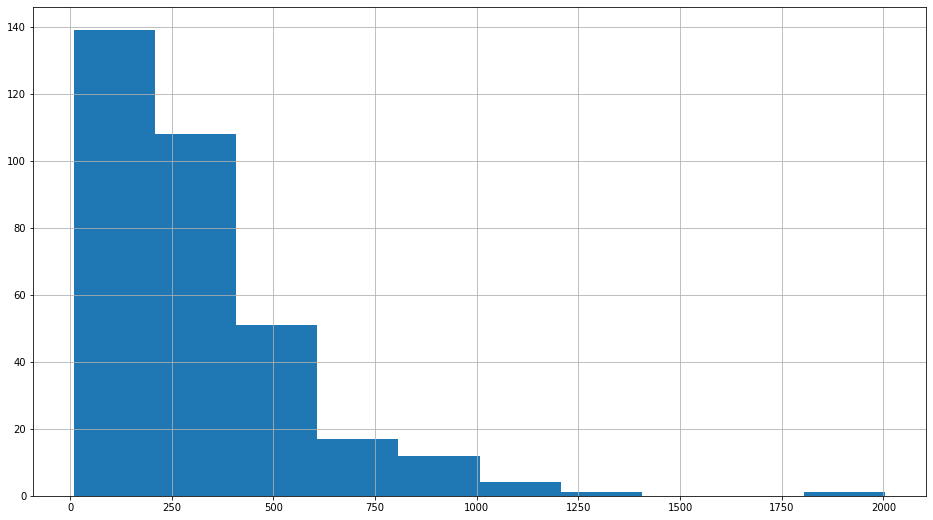

In [14]:
texts["n_chars"].hist()

In [16]:
texts["n_words"] = texts["text"].apply(lambda t: len(re.split(r"\s", t)))

<AxesSubplot:>

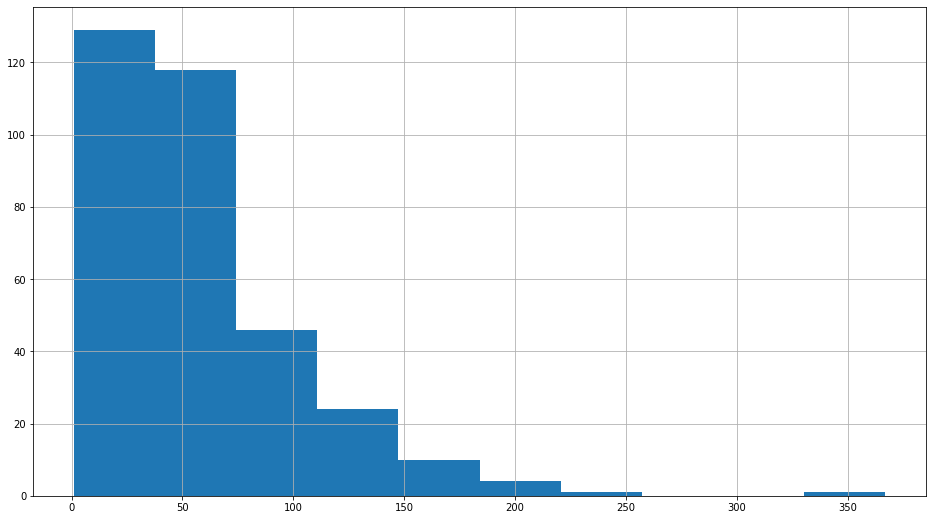

In [18]:
texts["n_words"].hist()

In [19]:
stops = stopwords.words("english")
def tokenize(texts):
    tokens = []
    if type(texts) == str:
        texts = [texts]
    for text in texts:
        if type(text) == str:
            for token in word_tokenize(text):
                if token not in stops and token.isalnum():
                    tokens.append(token.lower())
    return tokens

In [20]:
texts["tokens"] = texts["text"].apply(tokenize)

In [21]:
texts

,text,n_chars,n_words,tokens
0,On the right i can see a lake with boats. Behi...,125,27,"[on, right, see, lake, boats, behind, mountain..."
1,"It's a still and sleepy new year's Day, with j...",105,20,"[it, still, sleepy, new, year, day, breath, wi..."
2,"a steep rocky crevice, each hold so familiar t...",226,42,"[steep, rocky, crevice, hold, familiar, hands,..."
3,"Die Nacht ist bereits hereingebrochen, die Ste...",147,21,"[die, nacht, ist, bereits, hereingebrochen, di..."
4,I'm at the end of gravel covered breakwater wi...,142,29,"[i, end, gravel, covered, breakwater, pleasure..."
...,...,...,...,...
328,The sky today is a clear light blue and mostly...,234,43,"[the, sky, today, clear, light, blue, mostly, ..."
329,"The driveway is clean, few leaves on the groun...",201,40,"[the, driveway, clean, leaves, ground, there, ..."
330,beautiful,9,1,[beautiful]
331,The snow has just melted this week. There is ...,223,44,"[the, snow, melted, week, there, grass, also, ..."


In [137]:
vectorizer =  CountVectorizer(stop_words='english')
counts = vectorizer.fit_transform(texts.text.values)
counts_normalized_for_length = counts / texts.n_words.values[:,None]

In [139]:
average = np.array(counts_normalized_for_length.sum(axis=0) / counts_normalized_for_length.shape[0]).reshape(-1)

In [145]:
distances = []
for i in range(0, counts.shape[0]):
    row = counts_normalized_for_length[i,:].reshape(-1)
    distances.append(sp.spatial.distance.cosine(average, row))

In [146]:
texts["distance_to_mean_normalized"] = distances

In [152]:
for (_, row) in texts.sort_values("distance_to_mean_normalized").head(10).iterrows():
    print(row.text)
    print("----")

When I look out the window in my room, the first thing I notice are the two tall trees. One of the trees splits into two separate trunks. The trees are cool brown, with very minimal amounts of small green leaves. There is grass below the trees, but there are weeds in the grass. Further out from the trees is a parking lot, which is covered in concrete and gravel. There are 3 cars parked in the lot. 
----
Houses and trees
----
Trees; so many trees. snow covering the ground and bare trees covering the entirety of my surroundings. The bright sun reflecting off of the snow blinding me. 
----
Trees and gardens
----
Through my window I see that it is almost winter. I see a beautiful and peaceful green space (some of the few that remain in the ever-growing and transforming grey suburbs). Close by, I see grass and the hedge both with different colors of green. To the side, I see some plants still with flowers (in the summer they are visited by many bees and butterflies). Further away I see shru

In [153]:
for (_, row) in texts.sort_values("distance_to_mean", ascending=False).head(20).iterrows():
    print(row.text)
    print("----")

I can see Hochshulstrasse 50, Studenten Wohnheim infront of me. I can see Fritz Loffner strasse. 
----
Veo un paisaje de muchas fabricas y aparcamientos de autos
----
Shanghai Jiao Tong University
----
Tha ann an ath leathan agus tha tor solas na nolaig ann 
Oh mo chreach! OMC
----
Yamaha PSRE 463 keyboard, Hohner harmonicas, two Stylophones and a Casio VL Tone. Fender Squier PJ bass leaning on one of the sofas. 

Also aTV and a fish tank. All of the furniture is from IKEA outwith the weights bench. 
----
Oscuridad. Un interminable cielo gris. La ladera de una montaña con unos árboles que ya han perdido sus hojas. Unos preciosos coal tits. Nadie. 
----
The bridge twinkles and the stars sway
----
I see land and a lake Mohawk golf club. I also see a trails and streets. I even see a lake.
----
I can see cloud over the Cairngorms to the south
----
Upstairs lounge area
----
After a hectic week working at home this seascape gives me peace and relaxation.
----
a steep rocky crevice, each hold

In [154]:
vectorizer.inverse_transform((average >= 0.0
                        1).astype(int).reshape(1, -1))

[array([], dtype='<U18')]

In [1]:
average.argmax()

NameError: name 'average' is not defined

In [3]:
from nltk.tokenize import word_tokenize
word_tokenize("Hello Lena, what are we doing today?")

['Hello', 'Lena', ',', 'what', 'are', 'we', 'doing', 'today', '?']